In [1]:
import numpy as np
import clmm
import matplotlib.pyplot as plt

In [2]:
sigma_crit = 3.77988e+15

In [3]:
#35
def weight_ij(sigma_crit_ij=sigma_crit, sigma_shape=1, sigma_meas_ij=1):
    return sigma_crit_ij**-2 / (sigma_shape**2 + sigma_meas_ij**2)

#32
def weight_1_ij(theta_ij, sigma_crit_ij=sigma_crit, sigma_shape=1, sigma_meas_ij=1):
    return np.cos(4*theta_ij)**2 * weight_ij(sigma_crit_ij, sigma_shape, sigma_meas_ij)

#33
def weight_2_ij(theta_ij, sigma_crit_ij=sigma_crit, sigma_shape=1, sigma_meas_ij=1):
    return np.sin(4*theta_ij)**2 * weight_ij(sigma_crit_ij, sigma_shape, sigma_meas_ij)

In [4]:
gamma1 = np.load("gamma1.npy") * -1
gamma2 = np.load("gamma2.npy") * -1

x_arcsec = np.load("x_arcsec.npy")
y_arcsec = np.load("y_arcsec.npy")

theta = np.arctan2(y_arcsec, x_arcsec)
theta -= np.pi/2

In [5]:
#34
def delta_sigma_const(weight_ij, gamma_1_ij, sigma_crit_ij=sigma_crit):
    # TODO: summation over i
    return weight_ij*sigma_crit_ij*gamma_1_ij / weight_ij

#31
r = (x_arcsec**2 + y_arcsec**2)**0.5
num_bins = 10
r_bins = np.linspace(0, np.max(r), num_bins)
r_inds = np.digitize(r, r_bins)
def delta_sigma(weight_1_ij, weight_2_ij, gamma_1_ij, gamma_2_ij, theta_ij, sigma_crit_ij=sigma_crit):
    # TODO: summation over i
    return sigma_crit_ij*(weight_1_ij*gamma_1_ij/np.cos(4*theta_ij) + weight_2_ij*gamma_2_ij/np.sin(4*theta_ij)) / (weight_1_ij + weight_2_ij)

In [6]:
#37
def delta_sigma_cross(weight_1_ij, weight_2_ij, gamma_1_ij, gamma_2_ij, theta_ij, sigma_crit_ij=sigma_crit):
    # TODO: summation over i
    return sigma_crit_ij*(weight_1_ij*gamma_1_ij/np.cos(4*theta_ij) - weight_2_ij*gamma_2_ij/np.sin(4*theta_ij)) / (weight_1_ij + weight_2_ij)

#38
def delta_sigma_cross_const(weight_ij, gamma_2_ij, sigma_crit_ij=sigma_crit):
    # TODO: summation over i
    return weight_ij*sigma_crit_ij*gamma_2_ij / weight_ij

In [7]:
delta_sigmas = []
for i in range(num_bins):
    select = (r_inds-1) == i
    theta_i = theta[select]
    gamma_1_i = gamma1[select]
    gamma_2_i = gamma2[select]
    weight_i = weight_ij()
    weight_1_i = weight_1_ij(theta_i)
    weight_2_i = weight_2_ij(theta_i)
    delta_sigma_i = delta_sigma(weight_1_i, weight_2_i, gamma_1_i, gamma_2_i, theta_i)
    delta_sigmas.append(np.mean(delta_sigma_i))

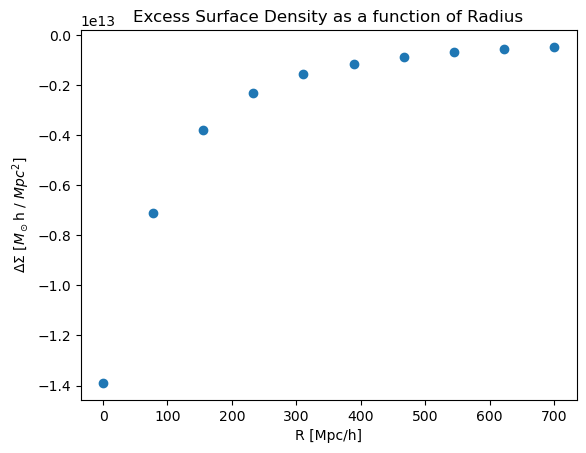

In [8]:
plt.scatter(r_bins, delta_sigmas)
plt.xlabel('R [Mpc/h]')
plt.ylabel('$\Delta \Sigma$ [$M_\odot$h / $Mpc^2$]')
plt.title('Excess Surface Density as a function of Radius')
plt.show()